<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#70e000; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;">SMS Spam Detection </div>

## Import necessary libraries

In [1]:
import nltk
from nltk.corpus import stopwords
import re
import subprocess
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Example to test functions

In [3]:
test_text = "Hi, Check our website http://example.com for daily coupons! Don't miss promotions."

## Function to remove stop words

In [4]:
# Import the necessary library for stopwords
stop_words = stopwords.words('english')  # Outside the function for code optimization

# Define the function for stop words removal
def stop_words_removal(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove stopwords
    tokens = [token for token in text.split() if token not in stop_words]

    # Join the remaining tokens to form the text without stopwords
    text_no_sw = " ".join(tokens)
    return text_no_sw

# Test the function
print("Input:", test_text)
test_text = stop_words_removal(test_text)
print("Output:", test_text)


Input: Hi, Check our website http://example.com for daily coupons! Don't miss promotions.
Output: hi, check website http://example.com daily coupons! miss promotions.


## Function to remove urls, punctuations and numbers

In [5]:
# Import the regular expression module
import re

# Define a regular expression pattern to match URLs
url_pattern = re.compile(r'http\S+|www\S+')

# Define a regular expression pattern to match non-alphanumeric characters and digits
cleaning_pattern = re.compile(r'[^\w\s]|[\d]')

# Define a function for removing URLs, punctuations, and numbers from text
def text_no_urls_puncs_nums(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove URLs using the compiled pattern
    text = url_pattern.sub('', text)
    
    # Remove punctuations and numbers using the compiled pattern
    text = cleaning_pattern.sub('', text)
    
    return text

# Test the function
print("Input:", test_text)
test_text = text_no_urls_puncs_nums(test_text)
print("Output:", test_text)


Input: hi, check website http://example.com daily coupons! miss promotions.
Output: hi check website  daily coupons miss promotions


## Function to lemmatize words

In [14]:
# Import necessary libraries
import nltk
import subprocess
from nltk.stem import WordNetLemmatizer

# Download and unzip wordnet if not already downloaded
try:
    nltk.data.find('/corpora/wordnet.zip')
except:
    # Download wordnet
    nltk.download('wordnet', download_dir='/working/corpora/')
    
    # Unzip the downloaded file to a specific directory
    #command = "unzip /working/wordnet.zip -d /working/"
    #subprocess.run(command.split())
    
    # Add the new directory to the NLTK data path
    nltk.data.path.append('/working/corpora/')

# Import NLTK resources
from nltk.corpus import wordnet



In [15]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
# Define a function for lemmatizing text
def lemmatize_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Tokenize the text and lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(text)]
    
    # Join the lemmatized tokens to form the lemmatized text
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [20]:
# Test the lemmatization function
#print("Input:", test_text)
#test_text = lemmatize_text(test_text)
#print("Output:", test_text)

## Function to clean text using previous functions

In [21]:
# Import necessary libraries
import nltk
import re
import subprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a regular expression pattern to match URLs
url_pattern = re.compile(r'http\S+|www\S+')

# Define a regular expression pattern to match non-alphanumeric characters and digits
cleaning_pattern = re.compile(r'[^\w\s]|[\d]')

# Define a function for removing URLs, punctuations, and numbers from text
def text_no_urls_puncs_nums(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove URLs using the compiled pattern
    text = url_pattern.sub('', text)
    
    # Remove punctuations and numbers using the compiled pattern
    text = cleaning_pattern.sub('', text)
    
    return text

# Download and unzip wordnet if not already downloaded
try:
    nltk.data.find('wordnet.zip')
except:
    # Download wordnet
    nltk.download('wordnet', download_dir='/kaggle/working/')
    
    # Unzip the downloaded file to a specific directory
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    
    # Add the new directory to the NLTK data path
    nltk.data.path.append('/kaggle/working/')

# Import NLTK resources
from nltk.corpus import wordnet

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatizing text
def lemmatize_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Tokenize the text and lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in nltk.word_tokenize(text)]
    
    # Join the lemmatized tokens to form the lemmatized text
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Define a function to remove stopwords
def stop_words_removal(text):
    text = text.lower()
    tokens = [token for token in text.split() if token not in stop_words]
    text_no_sw = " ".join(tokens)
    return text_no_sw

# Define a function to clean the

## Loading Dataset

In [22]:
# Read Dataset
data_orig = pd.read_csv('spam.csv',encoding='latin1')

In [23]:
data_orig.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
data_orig.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### The other columns represent sms replies by receiver, We are interested just about the first received SMS. So we re gonna use only the SMS content which the second column and the first column that represent the category (spam or ham)


In [25]:
data = data_orig.drop(data_orig.columns[[2,3,4]], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Rename columns

In [26]:
data.columns = ['class', 'text']
data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Convert class column to spam=1 ham=0

In [27]:
data['class'] = data['class'].apply(lambda x: 1 if x == 'spam' else 0)
data

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Clean Text

In [28]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define the clean_text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [29]:
data['text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,class,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


## Split data to train and test parts

In [30]:
X=data['text']
y=data['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [31]:
# Check Test samples percent
len(x_test)/len(data['text'])

0.20010768126346015

## Transform text to numerical 

In [32]:
# Import the CountVectorizer from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
cv = CountVectorizer()

# Transform the training data using the CountVectorizer and fit_transform
x_train = cv.fit_transform(x_train)

# Transform the test data using the already fitted CountVectorizer
x_test = cv.transform(x_test)

# Print the shape of the transformed training data
print("Shape of the transformed training data:", x_train.shape)

print("Shape of the transformed test data:", x_test.shape)


Shape of the transformed training data: (4457, 7806)
Shape of the transformed test data: (1115, 7806)


## Train the ANN classifier using the training data

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Convert sparse matrix to NumPy array
x_train_np = x_train.toarray()

# Assuming y_train is your labels

# Define the model
model = Sequential()
model.add(Dense(128, input_shape=(x_train_np.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_np, y_train, epochs=10, batch_size=32, validation_split=0.2)





Epoch 1/10


112/112 [==============================] - 3s 16ms/step - loss: 0.3394 - accuracy: 0.8780 - val_loss: 0.0991 - val_accuracy: 0.9709
Epoch 2/10
112/112 [==============================] - 1s 11ms/step - loss: 0.0716 - accuracy: 0.9798 - val_loss: 0.0529 - val_accuracy: 0.9854
Epoch 3/10
112/112 [==============================] - 1s 11ms/step - loss: 0.0258 - accuracy: 0.9927 - val_loss: 0.0449 - val_accuracy: 0.9899
Epoch 4/10
112/112 [==============================] - 1s 11ms/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.0470 - val_accuracy: 0.9877
Epoch 5/10
112/112 [==============================] - 1s 11ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.0545 - val_accuracy: 0.9854
Epoch 6/10
112/112 [==============================] - 1s 12ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0495 - val_accuracy: 0.9888
Epoch 7/10
112/112 [==============================] - 1s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0

## Evaluate the ANN model on test data

In [34]:
# Assuming x_test is your CountVectorized test data
x_test_np = x_test.toarray()

# Evaluate the model on the test set
eval_result = model.evaluate(x_test_np, y_test)

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

35/35 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9857
Test Loss: 0.13660494983196259
Test Accuracy: 0.9856502413749695


## Confusion Matrix

In [35]:
# Assuming y_test is a pandas Series
y_test = y_test.reset_index(drop=True)

# Example test element
random_test_index = np.random.randint(0, x_test.shape[0])
random_test_element = x_test[random_test_index]

# Convert the random test element to a NumPy array
random_test_element_np = random_test_element.toarray()

# Get the original text string for the random test element
original_text = x_test[random_test_index]

# Predict the label for the random test element
predicted_label = model.predict(random_test_element_np)

# Assuming predicted_label is a probability, use 0.5 as a threshold for binary classification
predicted_label_binary = 1 if predicted_label[0][0] >= 0.5 else 0


original_text = data['text'].iloc[random_test_index]

# Print the results
print("Random Test Element (Original Text):", original_text)
print("True Label:", y_test[random_test_index])
print("Predicted Label:", predicted_label_binary)

1/1 [==============================] - 0s 99ms/step
Random Test Element (Original Text): ur ringtone service changed 25 free credit go club4mobilescom choose content stop txt club stop 87070 150pwk club4 po box1146 mk45 2wt
True Label: 0
Predicted Label: 0


35/35 [==============================] - 0s 3ms/step


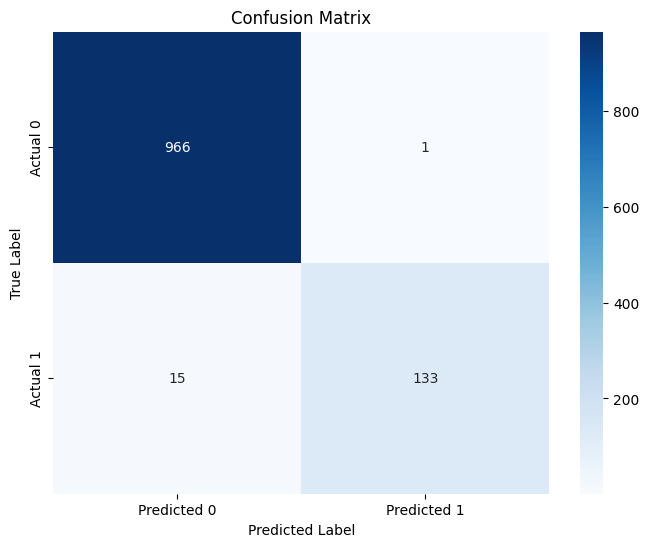

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the entire test set
y_pred = model.predict(x_test.toarray())
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

By Saad Farah